In [3]:
!git clone https://github.com/ahmddbilall/AI_Competition_Softec.git

fatal: destination path 'AI_Competition_Softec' already exists and is not an empty directory.


In [4]:

import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [5]:
batch_size=32
img_height=250
img_width=250


In [6]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/AI_Competition_Softec/softec-aic-2024/Training Images',
    validation_split=0.01,
    subset='training',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size


)

Found 226 files belonging to 2 classes.
Using 224 files for training.


In [7]:
val_ds=tf.keras.utils.image_dataset_from_directory(
    '/content/AI_Competition_Softec/softec-aic-2024/Training Images',
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(img_height,img_width),
    batch_size=batch_size


)

Found 226 files belonging to 2 classes.
Using 45 files for validation.


In [8]:
class_names=train_ds.class_names
print(class_names)


['Mitosis', 'Normal']


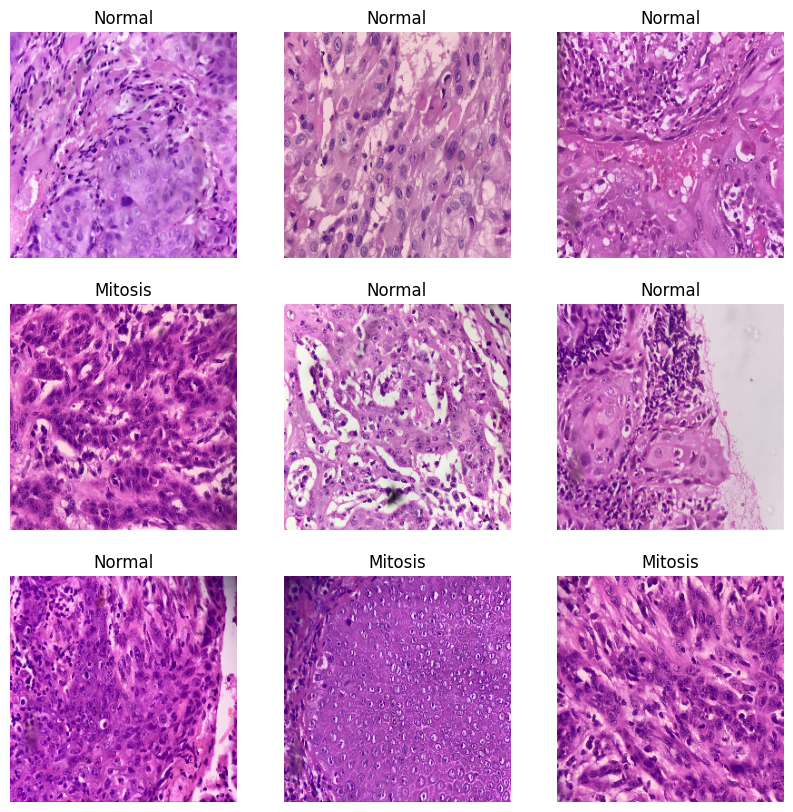

In [9]:
## visualizing
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for images,labels in train_ds.take(1):
  for i in range(9):
    ax=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [10]:
for image_batch,labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 250, 250, 3)
(32,)


In [11]:
AUTOTUNE=tf.data.AUTOTUNE
trian_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:
normalization_layer = layers.Rescaling(1./255)
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch,labels_batch=next(iter(normalized_ds))
first_image=image_batch[0]
print(np.min(first_image),np.max(first_image))

0.0 1.0


In [13]:
num_classes = len(class_names)
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model = Sequential([

  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  data_augmentation,
  layers.Conv2D(16, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='valid', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 250, 250, 3)       0         
                                                                 
 sequential (Sequential)     (None, 250, 250, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 248, 248, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 124, 124, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 32)        0         
 g2D)                                                 

In [15]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
7/7 [==============================] - 36s 3s/step - loss: 2.6710 - accuracy: 0.4866 - val_loss: 0.5823 - val_accuracy: 0.6889
Epoch 2/20
7/7 [==============================] - 30s 2s/step - loss: 0.6255 - accuracy: 0.6473 - val_loss: 0.5158 - val_accuracy: 0.8889
Epoch 3/20
7/7 [==============================] - 30s 2s/step - loss: 0.5955 - accuracy: 0.6429 - val_loss: 0.4545 - val_accuracy: 0.8667
Epoch 4/20
7/7 [==============================] - 31s 2s/step - loss: 0.6270 - accuracy: 0.6250 - val_loss: 0.7663 - val_accuracy: 0.3778
Epoch 5/20
7/7 [==============================] - 30s 2s/step - loss: 0.6301 - accuracy: 0.6205 - val_loss: 0.5422 - val_accuracy: 0.6889
Epoch 6/20
7/7 [==============================] - 30s 2s/step - loss: 0.5832 - accuracy: 0.7143 - val_loss: 0.4609 - val_accuracy: 0.7778
Epoch 7/20
7/7 [==============================] - 31s 2s/step - loss: 0.4657 - accuracy: 0.7946 - val_loss: 0.4018 - val_accuracy: 0.8000
Epoch 8/20
7/7 [==================

In [21]:


# Specify the path where you want to save the model
model_path = '/content/AI_Competition_Softec/softec-aic-2024/model.h5'

# Save the model to the specified path
model.save(model_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


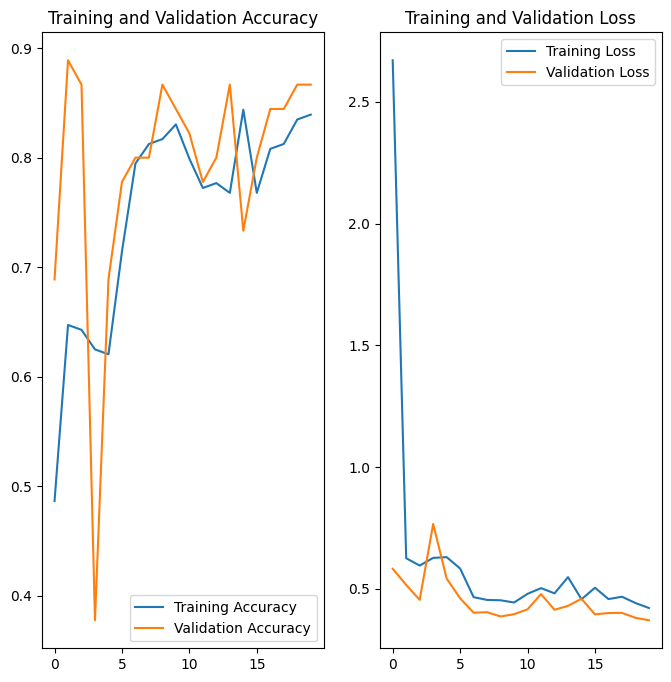

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [52]:
import os
import tensorflow as tf
import numpy as np

folder_path = "/content/AI_Competition_Softec/softec-aic-2024/Testing Images"


image_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith(".jpg")]


model = tf.keras.models.load_model('/content/AI_Competition_Softec/softec-aic-2024/model.h5')


img_height, img_width = 250,250

predictions = []


for image_file in image_files:

    img = tf.keras.utils.load_img(image_file, target_size=(img_height, img_width))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    # Make predictions
    prediction = model.predict(img_array)


    prediction_label = "Mitosis" if prediction[0][0] > -0.31 else "Normal"

    predictions.append(prediction_label)


predictions_array = np.array(predictions)

print(predictions_array)


1/1 [==============================] - 0s 51ms/step
['Normal' 'Normal' 'Normal' 'Mitosis' 'Normal' 'Mitosis' 'Mitosis'
 'Mitosis' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal' 'Mitosis'
 'Mitosis' 'Normal' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal' 'Normal'
 'Mitosis' 'Mitosis' 'Normal' 'Normal' 'Mitosis' 'Normal' 'Normal'
 'Normal' 'Normal' 'Mitosis' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Mitosis' 'Normal' 'Mitosis' 'Normal' 'Normal' 'Normal' 'Normal'
 'Normal' 'Normal' 'Mitosis' 'Normal' 'Mitosis' 'Mitosis' 'Normal'
 'Mitosis' 'Mitosis' 'Mitosis' 'Mitosis' 'Normal']


In [56]:
import pandas as pd

test = pd.read_csv('/content/AI_Competition_Softec/softec-aic-2024/Test.csv')
test['Label'] = predictions

# Convert probability predictions to class labels

test.to_csv('predictions.csv',index=False)


In [54]:
df=pd.read_csv("predictions.csv")
df2=pd.read_csv("predtions.csv")

y_pred=df["Label"]
y_acc=df2["Label"]
accuracy = np.mean(y_acc == y_pred)  # Accuracy calculation
print("Accuracy:", accuracy)

Accuracy: 0.631578947368421
